<a href="https://colab.research.google.com/github/rajan-dhinoja/Multiple_Disease_Prediction/blob/main/notebook_files/Parkinsons_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Parkinsons Disease Prediction**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

Mounted at /content/drive
✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/parkinsons.csv'))
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,...,0.07,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,...,0.09,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,...,0.08,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,...,0.09,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,...,0.10,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41


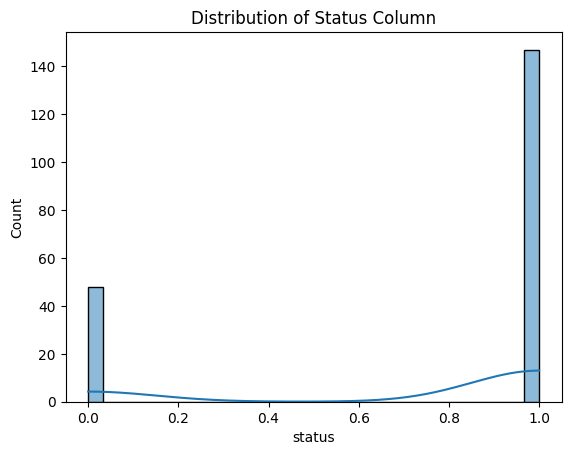

In [3]:
# Plot target distribution

# plt.figure(figsize=(10, 6))
sns.histplot(dataset['status'], bins=30, kde=True)
plt.title('Distribution of Status Column')
plt.show()

In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['name'], dtype='object') 

✅ Numerical Columns found: 
 Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (195, 24) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non

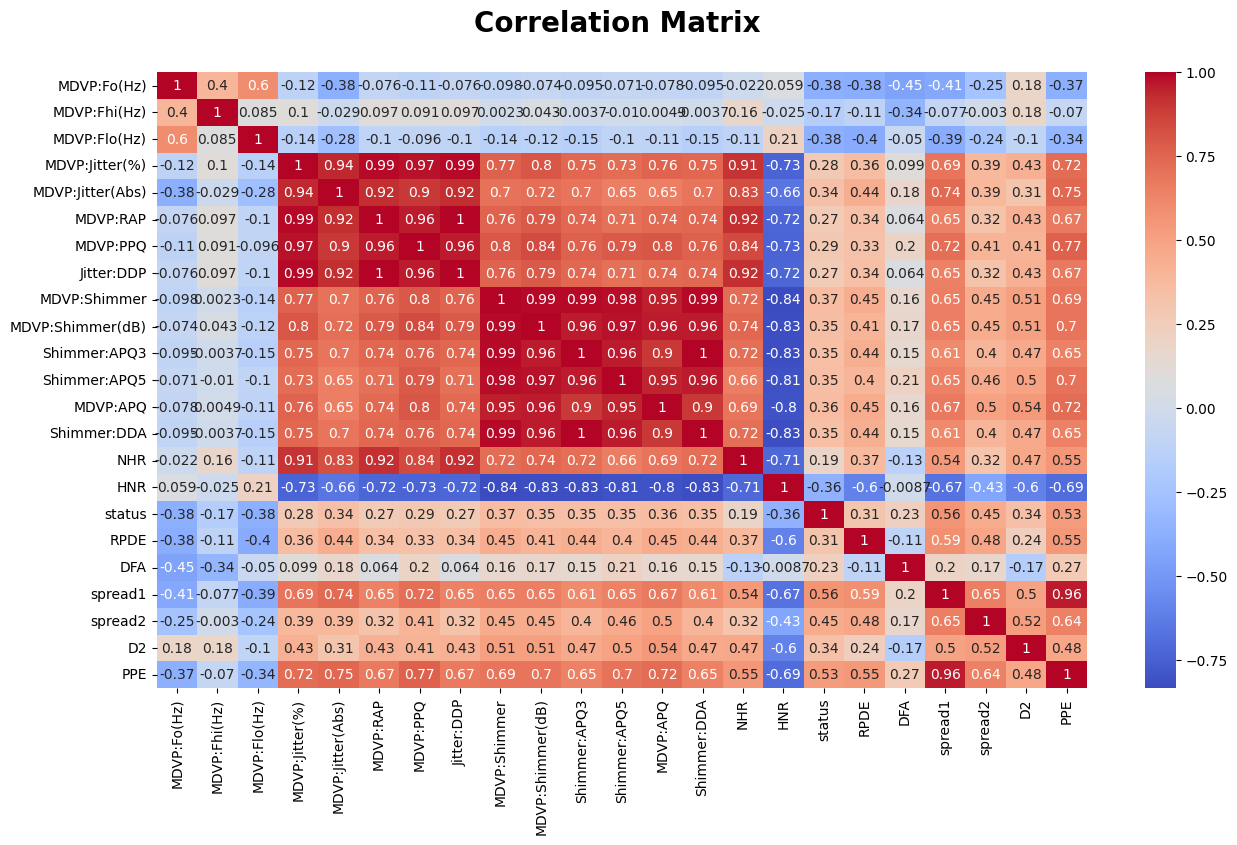

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")

❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [10]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():

#   nltk.download('stopwords')

#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.drop(columns=['name','status'], axis=1)
y = dataset['status']

repeating_cols = []

if categorical_cols.empty:
  print("❌ No Encoding needed! No Categorical Columns found...")
else:
  for col in categorical_cols:
      # Matrix of Feature
      if col != y.name:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          print(f"\t✅ '{col}' is Encoded Successfully...\n")

        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

      # Dependent Variable/Output
      if col == y.name:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t✅ '{col}' is Encoded Successfully...\n")
        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

  print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
  if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    encoder_transform = encoder.fit_transform(X)

    # Conditional conversion to dense array
    if scipy.sparse.issparse(encoder_transform):  # Check if sparse
      X = encoder_transform.toarray()
    else:
      X = encoder_transform

  else:
    print("❌ No Repeating Columns found in Matrix of Features(X). \n")

  # print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
  # print("\n")
  # print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


> String Values present in Column 'name'.
	❌ But No Categorical values found in column 'name'.

=> Repeating Columns in Matrix of Features(X):  [] 

❌ No Repeating Columns found in Matrix of Features(X). 



## Step-4: Split the Dataset into the Training set and Test set:-

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [13]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("✅ Feature Scaling is Done Successfully...\n")

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print(pd.DataFrame(X).head().to_string())

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

model =  RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
print(f"✅ {model} is trained Sucessfully...\n ")
print(f"   Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
print(f"   Precision: \t {precision_score(y_test, y_pred):.2f}")
print(f"   Recall: \t\t {recall_score(y_test, y_pred):.2f}")
print(f"   F1 Score: \t {f1_score(y_test, y_pred):.2f}")
print(f"   ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")
# print("\n")


✅ RandomForestClassifier(random_state=42) is trained Sucessfully...
 
   Accuracy: 	 0.95
   Precision: 	 0.94
   Recall: 		 1.00
   F1 Score: 	 0.97
   ROC-AUC Score: 0.86



# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [15]:
import pickle

pickle.dump(model, open('RandomForestClassifier.sav', "wb"))
print(f"✅ Model saved: RandomForestClassifier.sav")

✅ Model saved: RandomForestClassifier.sav


## Step-2: Predicting and Testing the Model:-

In [16]:
correct_predictions = 0
max_correct_predictions = 0
model_predictions = {} # dictionary to store model and their correct predictions

random_value = np.random.randint(3, 5)
print("Number of Inputs for Predction: ", random_value, "\n")

for i in range(random_value):
  sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
  sample_output = round(y_train[i], 2)

  print("Before Predicting, Sample Data & Output Sales are:-")
  print("> Sample Data: ", sample_input)
  print("> Output: ",sample_output, "\n")

  model = pickle.load(open(f"RandomForestClassifier.sav", "rb"))
  prediction = model.predict(sample_input)
  rounded_prediction = round(prediction[0], 2)
  print(f" - Predicted Sales: {rounded_prediction:.2f}")

  if rounded_prediction == sample_output:
      correct_predictions += 1
      print("\t✅ Nice Work! your Prediction is correct...\n")
      # increment correct prediction count for the model in the dictionary
      model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
  else:
      print("\t❌ Oops! your Prediction is incorrect...\n")

  print("="*75, "\n")

Number of Inputs for Predction:  3 

Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[-0.80 -0.71 -0.11 0.68 1.00 0.43 1.36 0.43 0.85 0.82 0.70 1.33 0.44
  0.70 -0.30 -0.12 -0.76 1.88 1.35 0.90 -0.48 1.65]]
> Output:  1 

 - Predicted Sales: 1.00
	✅ Nice Work! your Prediction is correct...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[-1.04 -0.75 -0.30 -0.23 -0.08 -0.26 -0.10 -0.26 0.56 0.45 0.61 0.60
  0.48 0.61 0.00 -0.90 1.49 -0.28 0.37 1.18 0.65 0.27]]
> Output:  1 

 - Predicted Sales: 1.00
	✅ Nice Work! your Prediction is correct...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[-0.38 0.13 -0.82 0.18 0.19 0.25 0.18 0.25 0.74 0.75 0.94 0.58 0.43 0.94
  -0.13 -0.77 0.40 0.35 0.30 -0.78 -0.73 0.29]]
> Output:  1 

 - Predicted Sales: 1.00
	✅ Nice Work! your Prediction is correct...




In [17]:
# Instead of using max, we'll iterate and check for at least one correct prediction
models_with_correct_predictions = []  # List to store models with at least one correct prediction

for model_name, correct_count in model_predictions.items():
    if correct_count >= 1:  # Check for at least one correct prediction
        models_with_correct_predictions.append(model_name)

# Print the results
if models_with_correct_predictions:
    for model_name in models_with_correct_predictions:
        print(f"- ✅ '{model_name}' has achieved:\n\t\t\t '{model_predictions[model_name]}' out of {random_value} correct predictions")
else:
    print("No models achieved any correct predictions on the samples.")

- ✅ 'RandomForestClassifier' has achieved:
			 '3' out of 3 correct predictions


## Step-3: Predicting the Result from saved Model:-

In [18]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# input_data = pd.DataFrame(X).iloc[random_input]  # Convert a row to an array
# # changing input data to a numpy array
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# feature_names = pd.DataFrame(X).columns  # Get the feature names (column names)

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(name) for name in feature_names)

# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"RandomForestClassifier.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Parkinsons Disease...")

# else:
#   print("⚠️ Oops! The Person has a Parkinsons Disease...")